In [88]:
%load_ext autoreload
%autoreload 2
import os, sys
sys.path.append('..')
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("poster")
%load_ext line_profiler

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [89]:
from src.utils import MERFDataGenerator
from src.merf import MERF

# Test Data Generation

In [90]:
dgm = MERFDataGenerator(m=0.6, sigma_b=2, sigma_e=1)

In [91]:
train, test_known, test_new = dgm.generate_split_samples([10, 20], [20, 10], [20, 20])

INFO     [utils.py:122] Drew 100 samples from 4 clusters.
INFO     [utils.py:123] PTEV = 88.47438606222524, PREV = 52.108251668086794.


In [92]:
train.head()

,y,X_0,X_1,X_2,Z,cluster
0,5.751227,0.536732,0.020442,0.084786,1.0,0
1,1.462371,0.421538,0.021425,-0.725227,1.0,0
2,3.693184,-0.467887,-0.428917,0.563541,1.0,0
3,10.397796,1.764659,1.087555,0.871969,1.0,0
4,3.630274,0.063400,0.075035,0.437643,1.0,0


In [93]:
test_known.head()

,y,X_0,X_1,X_2,Z,cluster
10,2.277568,0.783202,-0.649050,-0.138679,1.0,0
11,1.544331,-1.260171,0.588274,-0.465780,1.0,0
12,3.975740,-0.620685,0.957322,-0.125577,1.0,0
13,0.615488,-2.074965,0.627513,-0.521346,1.0,0
14,4.028944,0.321459,-0.411326,-0.148913,1.0,0


# MERF Training

In [115]:
X = train[['X_0', 'X_1', 'X_2']]
Z = train[['Z']]
clusters = train['cluster']
y = train['y']

In [116]:
mrf = MERF(n_estimators=300, max_iterations=10)

In [117]:
mrf.fit(X, Z, clusters, y)

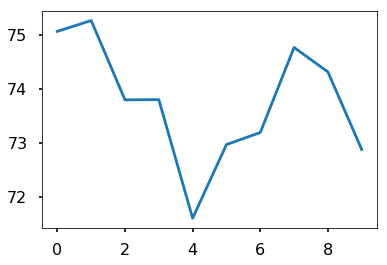

In [118]:
plt.plot(mrf.gll_history)

In [119]:
mrf.cluster_counts

1    20
0    10
Name: cluster, dtype: int64

In [120]:
mrf.trained_b

,0
1,0.001571
0,0.001571


# MERF Prediction

In [135]:
X_known = test_known[['X_0', 'X_1', 'X_2']]
Z_known = test_known[['Z']]
clusters_known = test_known['cluster']
y_known = test_known['y']

In [136]:
y_hat_known = mrf.predict(X_known, Z_known, clusters_known)

In [137]:
assert len(y_hat_known) == len(y_known)

In [138]:
X_new = test_new[['X_0', 'X_1', 'X_2']]
Z_new = test_new[['Z']]
clusters_new = test_new['cluster']
y_new = test_new['y']

In [139]:
y_hat_new = mrf.predict(X_new, Z_new, clusters_new)

In [140]:
assert len(y_hat_new) == len(y_new)

# MERF Accuracy

In [ ]:
# Train and test using classic random forest. 